In [ ]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from sklearn.model_selection import train_test_split

# --- Load data ---
df = pd.read_csv('reviews.csv')
df = df.dropna(subset=['UserId', 'ProductId', 'Score', 'Text', 'Summary'])

# --- split ---
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['Score'], random_state=42)

# --- feature engineering ---
def engineer_features(data):
    data = data.copy()
    data['TextLengthWords'] = data['Text'].apply(lambda x: len(str(x).split()))
    data['TextLengthChars'] = data['Text'].apply(lambda x: len(str(x)))
    data['SummaryLengthWords'] = data['Summary'].apply(lambda x: len(str(x).split()))
    data['TextToSummaryRatio'] = data['TextLengthWords'] / (data['SummaryLengthWords'] + 1)

    data['SentimentText_Polarity'] = data['Text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    data['SentimentText_Subjectivity'] = data['Text'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)
    data['SentimentSummary_Polarity'] = data['Summary'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    data['SentimentDelta'] = data['SentimentText_Polarity'] - data['SentimentSummary_Polarity']

    data['NumExclamations'] = data['Text'].apply(lambda x: str(x).count('!'))
    data['NumUppercaseWords'] = data['Text'].apply(lambda x: sum(1 for w in str(x).split() if w.isupper()))
    data['HasQuestionMark'] = data['Text'].apply(lambda x: int('?' in str(x)))
    data['ContainsNegation'] = data['Text'].apply(lambda x: int(bool(re.search(r"\b(not|no|never|n't)\b", str(x).lower()))))
    data['StartsWithCapital'] = data['Text'].apply(lambda x: int(str(x).split()[0].istitle() if str(x).split() else 0))
    data['AvgWordLength'] = data['Text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]) if len(str(x).split()) > 0 else 0)

    return data

# --- Stap 4: Feature engineering  ---
train_features = engineer_features(train_df)
test_features = engineer_features(test_df)

# --- Stap 5: safe ---
train_features.to_csv('train_features.csv', index=False)
test_features.to_csv('test_features.csv', index=False)

print("✅ Done! Train and test feature sets saved separately.")


✅ Done! Train and test feature sets saved separately.


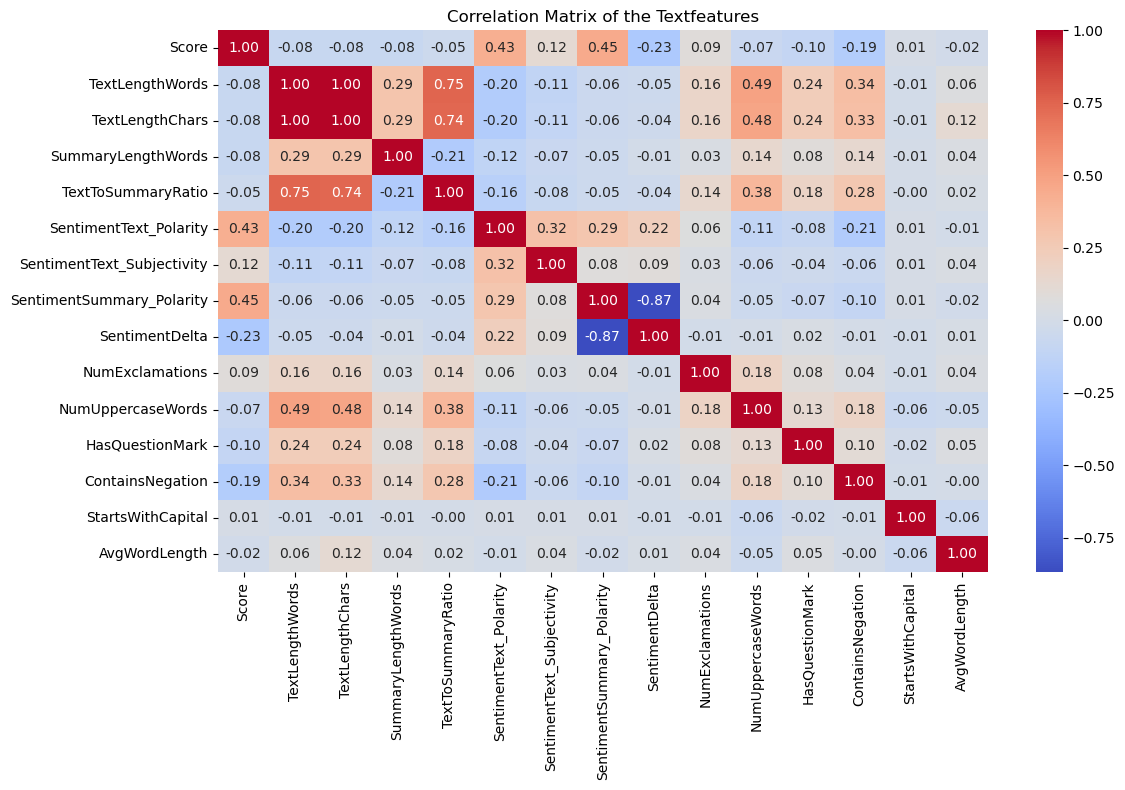

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('train_features.csv')
df = df.drop(['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Id', 'Time'], axis=1)

numeric_features = df.select_dtypes(include=[np.number])
corr = numeric_features.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of the Textfeatures")
plt.tight_layout()
plt.show()

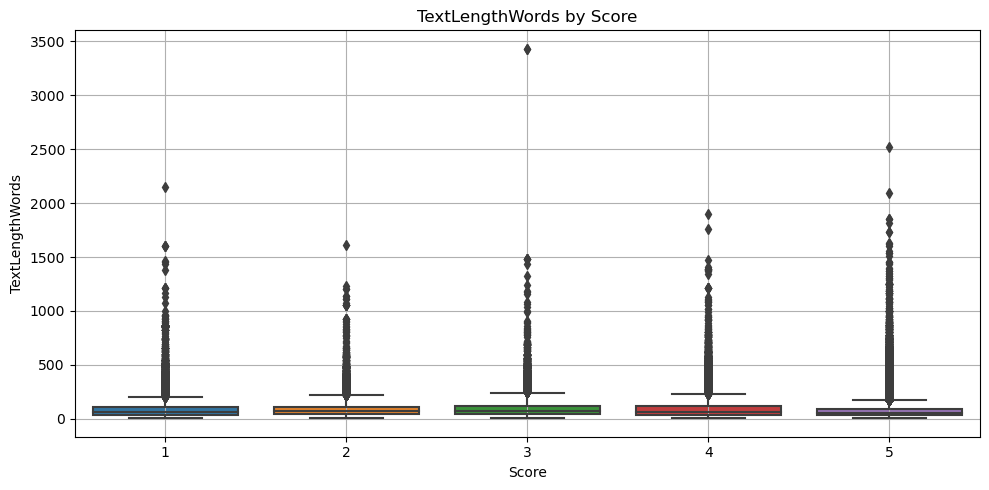

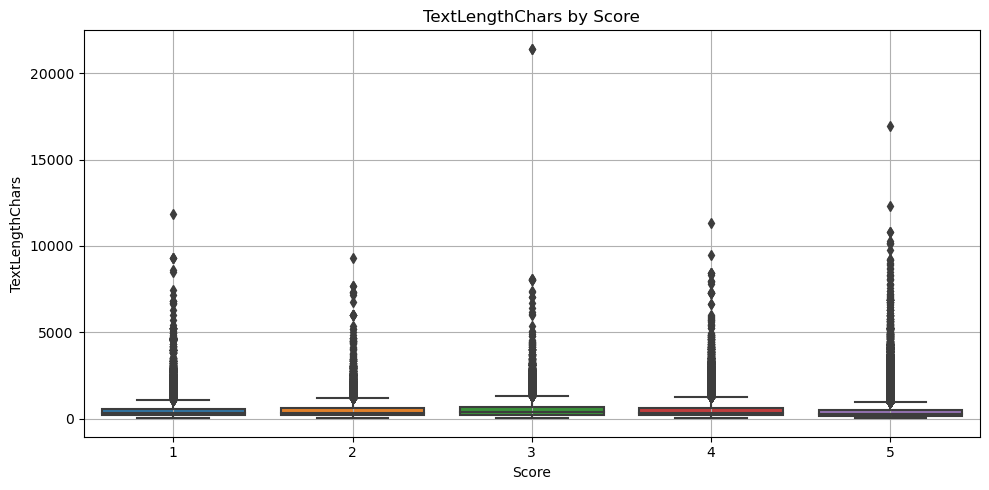

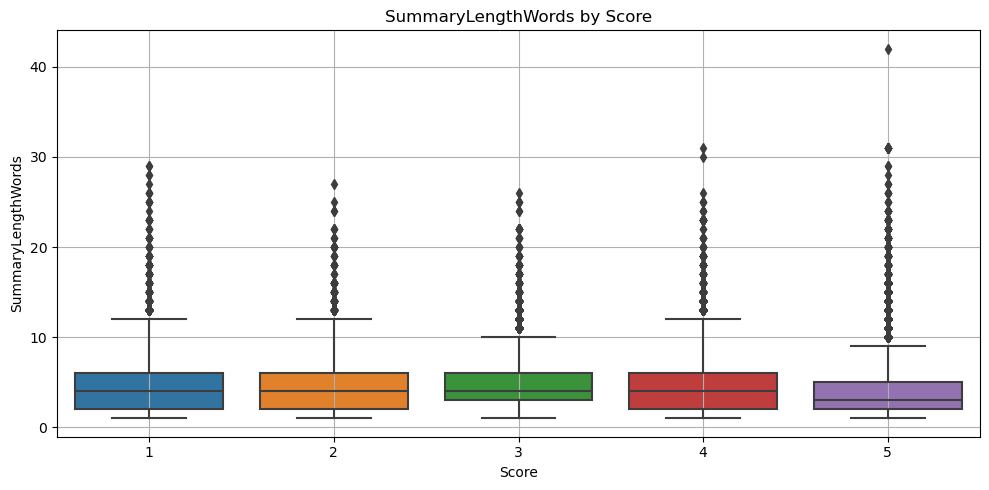

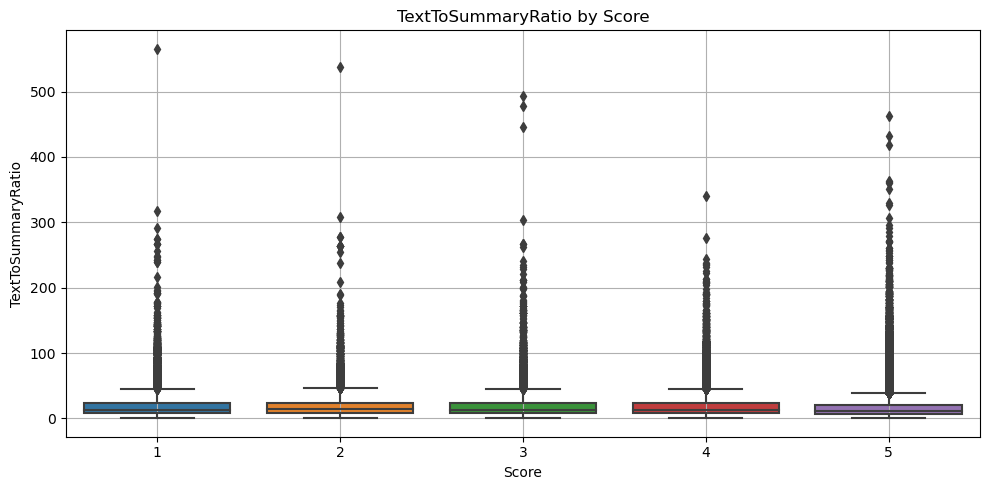

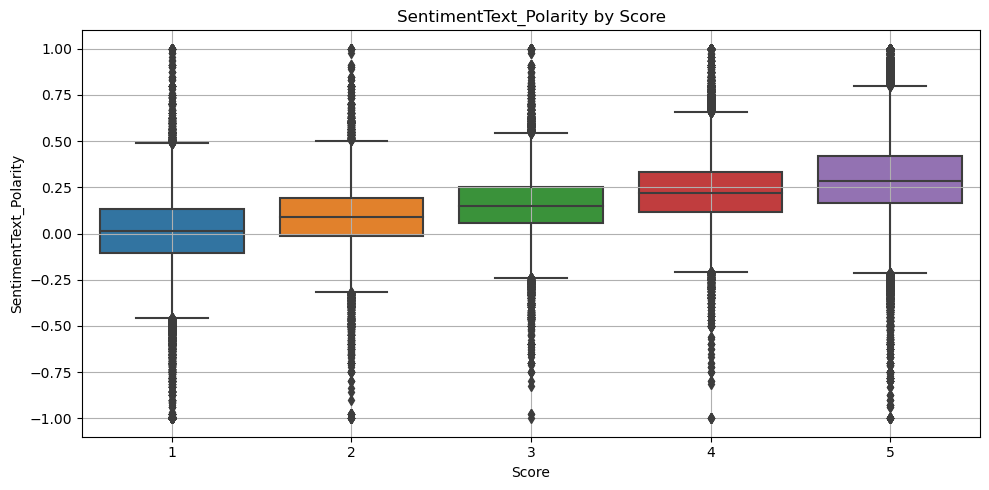

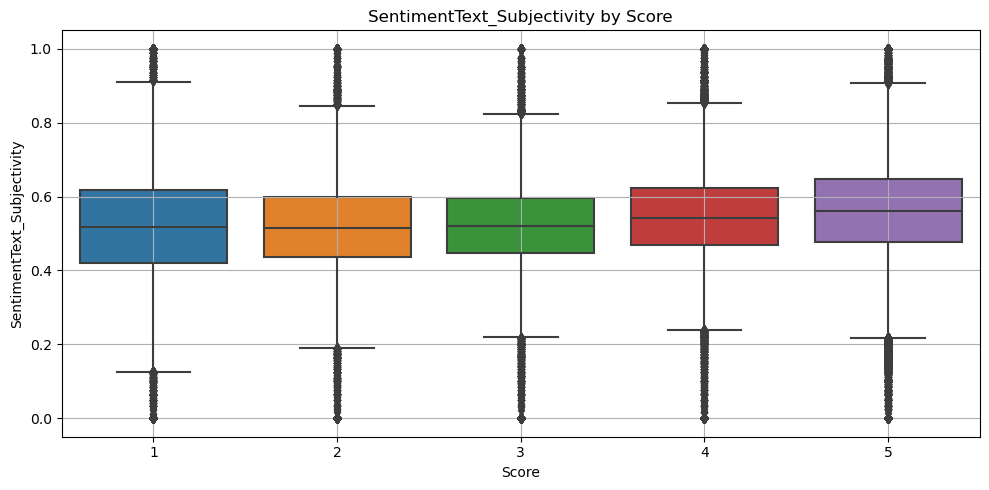

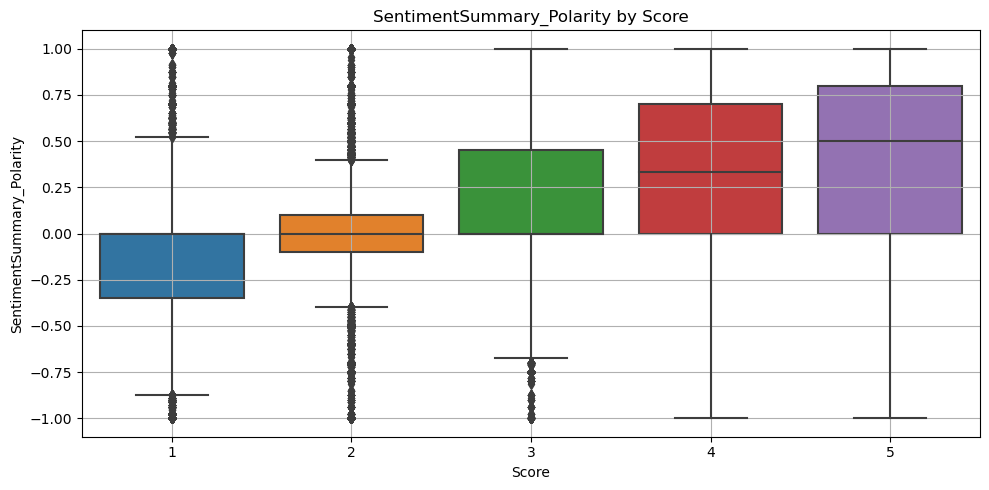

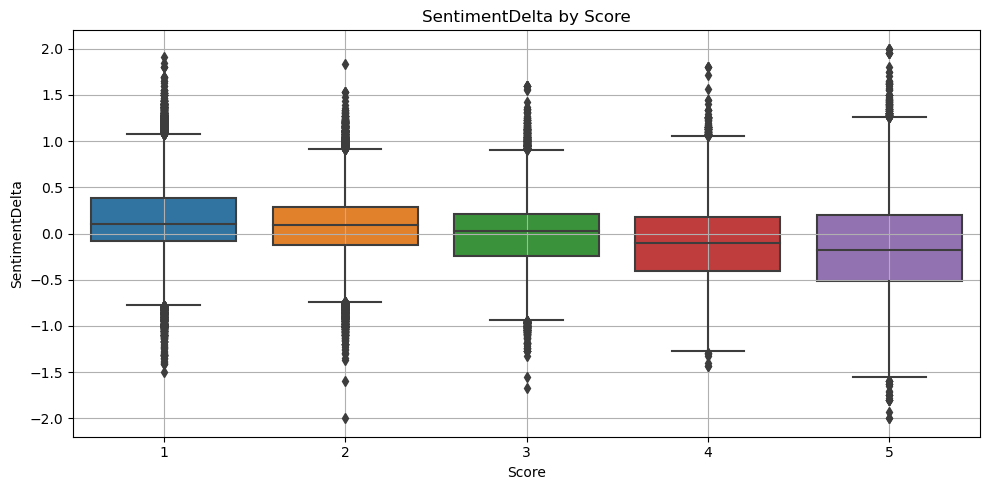

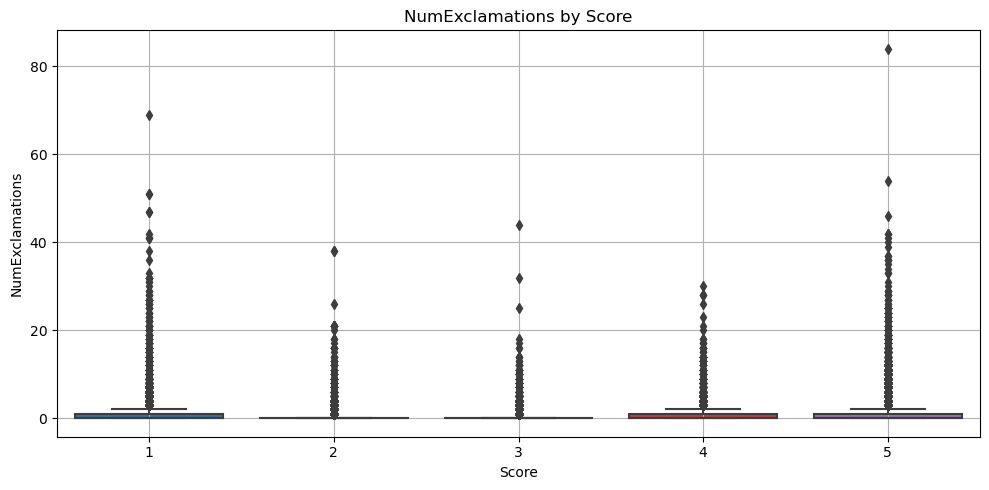

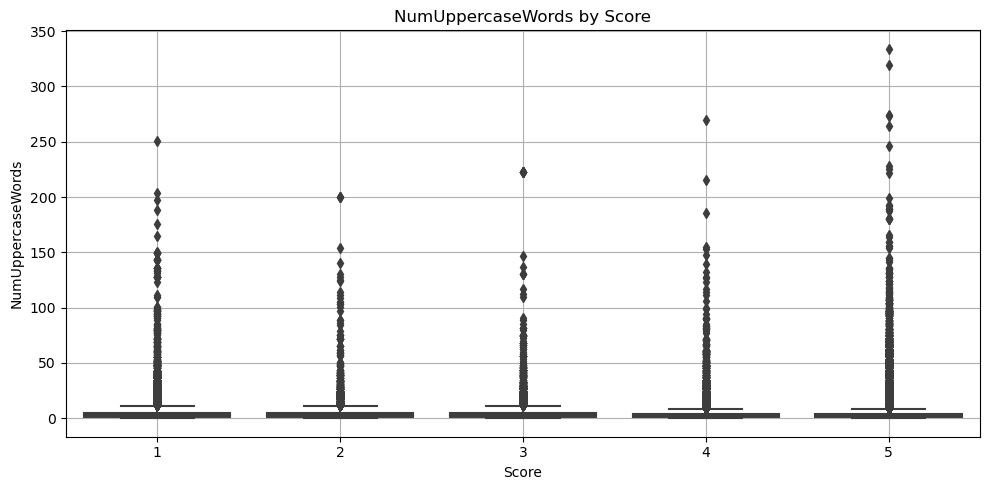

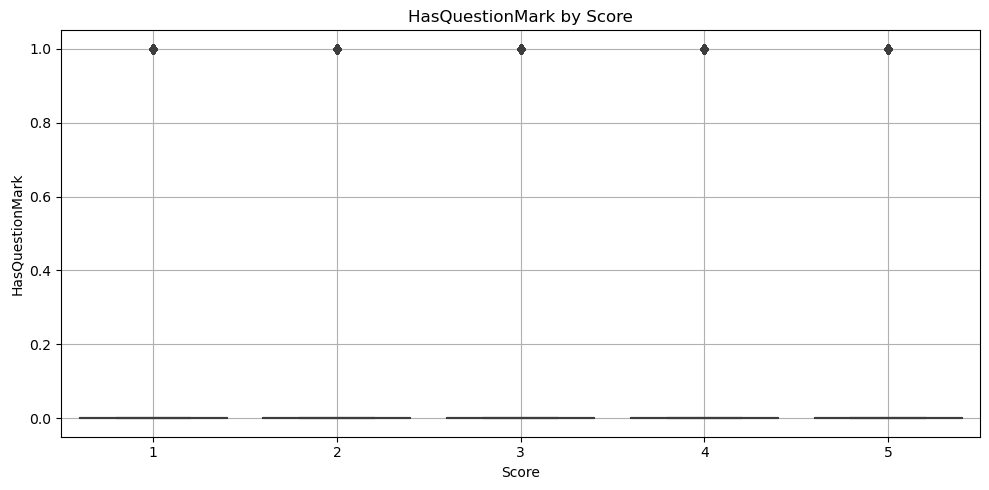

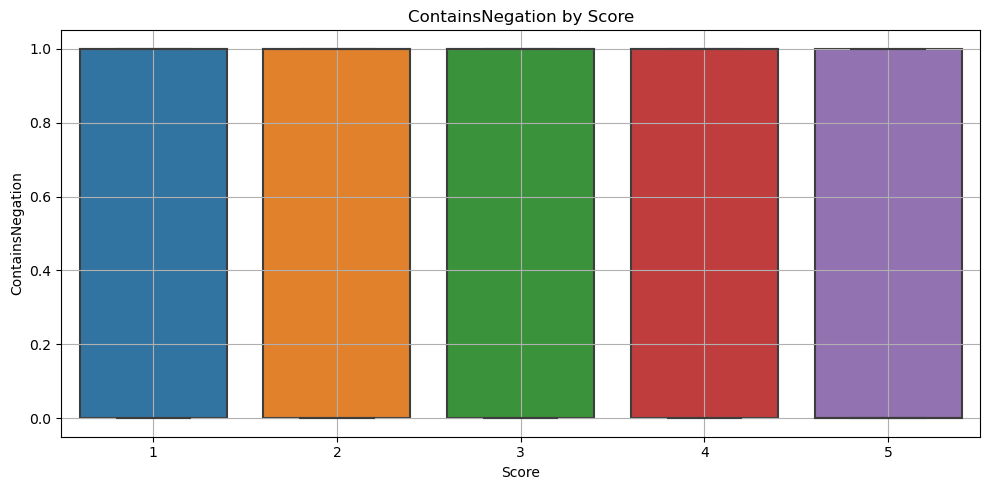

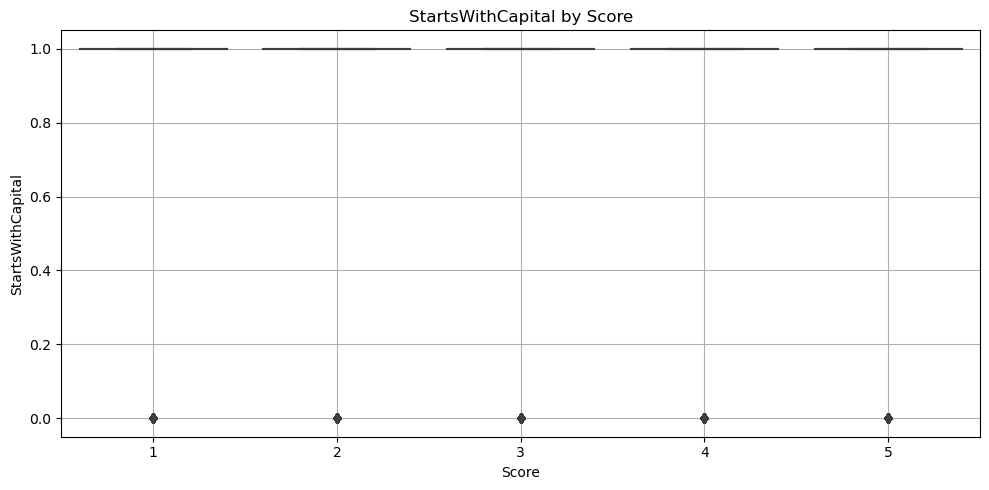

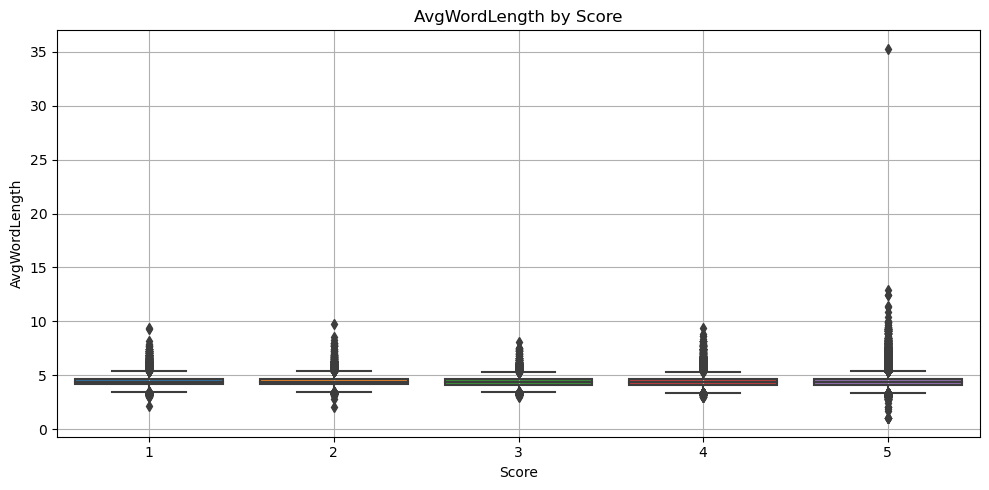

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

features = [
    'TextLengthWords',
    'TextLengthChars',
    'SummaryLengthWords',
    'TextToSummaryRatio',
    'SentimentText_Polarity',
    'SentimentText_Subjectivity',
    'SentimentSummary_Polarity',
    'SentimentDelta',
    'NumExclamations',
    'NumUppercaseWords',
    'HasQuestionMark',
    'ContainsNegation',
    'StartsWithCapital',
    'AvgWordLength'
]

df['Score'] = df['Score'].astype(str)
df['Score'] = pd.Categorical(df['Score'], categories=['1', '2', '3', '4', '5'], ordered=True)

# Generate boxplot for every feature
for feature in features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Score', y=feature, data=df)
    plt.title(f'{feature} by Score')
    plt.grid(True)
    plt.tight_layout()
    plt.show()